In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 0 = airplane
# 1 = automobile
# 2 = bird
# 3 = cat
# 4 = deer
# 5 = dog
# 6 = frog
# 7 = horse
# 8 = ship
# 9 = truck

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


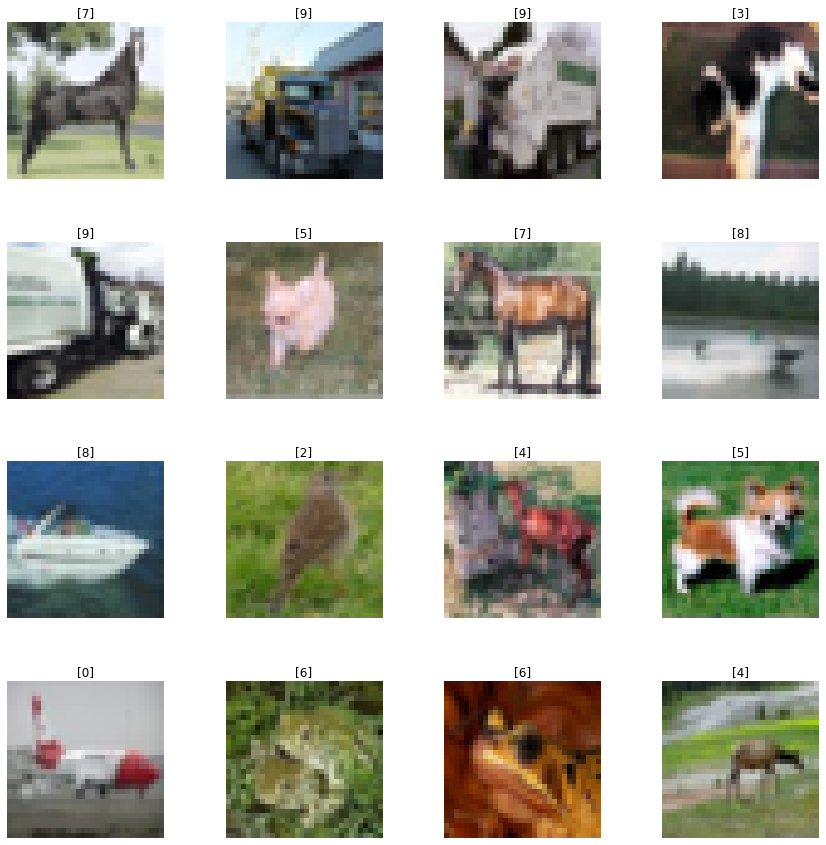

In [5]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid ):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [6]:
# Prepare data for CNN
X_train = X_train/255.0
X_test = X_test/255.0

y_train = tf.keras.utils.to_categorical( y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical( y_test, num_classes = 10)

In [7]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [8]:
annealer = LearningRateScheduler( lambda x: 1e-3 * 0.95 ** x, verbose = 0 )
styles = [':', '-.', '--', '-', ':', '-.', '--', '-', ':', '-.', '--', '-']

In [9]:
from tensorflow.keras import models, layers
input_shape = X_train.shape[1:]

In [10]:
# Experiment 1
# How many convolution-subsampling pairs?
nets = 4
model = [0]*nets

for j in range(nets):
    model[j] = models.Sequential()
    model[j].add( layers.Conv2D( 24, kernel_size = 5, padding='same', activation='relu', input_shape=input_shape))
    model[j].add( layers.MaxPool2D())
    if j > 0:
        model[j].add( layers.Conv2D(48, kernel_size=5, padding='same', activation='relu'))
        model[j].add( layers.MaxPool2D())
    if j > 1:
        model[j].add( layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'))
        model[j].add( layers.MaxPool2D())
    if j > 2:
        model[j].add( layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'))
        model[j].add( layers.MaxPool2D())
    model[j].add( layers.Flatten())
    model[j].add( layers.Dense(128, activation = 'relu'))
    model[j].add( layers.Dense(10, activation = 'softmax'))
    model[j].compile( optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    model[j].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 24)        1824      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 24)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6144)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               786560    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 789,674
Trainable params: 789,674
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                

In [11]:
hist = [0]*nets
names = ['(C-P)x1', '(C-P)x2', '(C-P)x3', '(C-P)x4']
epochs = 20
for j in range(nets):
    hist[j] = model[j].fit(X_train, y_train, batch_size=80, epochs=epochs, validation_data=(X_test,y_test), callbacks = [annealer], verbose = 0)
    print( 'CNN {0}: Epochs = {1:d}, Train accuracy = {2:.5f}, Validation accuracy = {3:.5f}'.format(
    names[j], epochs, max(hist[j].history['accuracy']), max(hist[j].history['val_accuracy']) ))

CNN (C-P)x1: Epochs = 20, Train accuracy = 0.90422, Validation accuracy = 0.66440
CNN (C-P)x2: Epochs = 20, Train accuracy = 0.95710, Validation accuracy = 0.71100
CNN (C-P)x3: Epochs = 20, Train accuracy = 0.98526, Validation accuracy = 0.73540
CNN (C-P)x4: Epochs = 20, Train accuracy = 0.98944, Validation accuracy = 0.72690


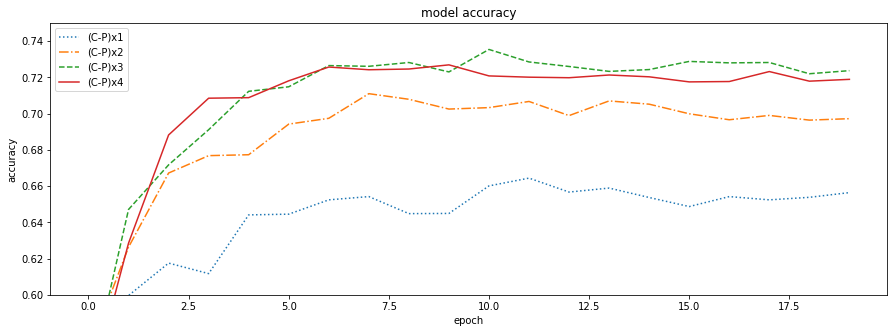

In [12]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot( hist[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.6,0.75])
plt.show()

In [13]:
# Experiment 2
# How many feature maps?
    
nets = 9
model = [0]*nets
for j in range(nets):
    model[j] = models.Sequential()
    model[j].add( layers.Conv2D( (j+1)*8, kernel_size = 5, padding='same', activation='relu', input_shape = input_shape))
    model[j].add( layers.MaxPool2D() )
        
    model[j].add( layers.Conv2D( (j+1)*16, kernel_size = 5, padding='same', activation='relu') )
    model[j].add( layers.MaxPool2D())
        
    model[j].add( layers.Conv2D( (j+1)*32, kernel_size = 5, padding='same', activation='relu'))
    model[j].add( layers.MaxPool2D())
        
    model[j].add( layers.Flatten())
    model[j].add( layers.Dense(256, activation='relu'))
    model[j].add( layers.Dense(10, activation='softmax'))
    model[j].compile( optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    model[j].summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 8)         608       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 16)        3216      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 56)        4256      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 112)       156912    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 224)         627424    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 224)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3584)            

In [14]:
hist = [0]*nets
names = ['8 maps', '16 maps', '24 maps', '32 maps', '40 maps', '48 maps', '56 maps', '64 maps', '72 maps', '80 maps']
epochs = 20
for j in range(nets):
    hist[j] = model[j].fit(X_train, y_train, batch_size=80, epochs=epochs, 
                            validation_data=(X_test,y_test), callbacks = [annealer], verbose = 0)
    print( 'CNN {0}: Epochs = {1:d}, Train accuracy = {2:.5f}, Validation accuracy = {3:.5f}'.format(
    names[j], epochs, max(hist[j].history['accuracy']), max(hist[j].history['val_accuracy']) ))

CNN 8 maps: Epochs = 20, Train accuracy = 0.87980, Validation accuracy = 0.69230
CNN 16 maps: Epochs = 20, Train accuracy = 0.99174, Validation accuracy = 0.72520
CNN 24 maps: Epochs = 20, Train accuracy = 0.99550, Validation accuracy = 0.73410
CNN 32 maps: Epochs = 20, Train accuracy = 0.99574, Validation accuracy = 0.73340
CNN 40 maps: Epochs = 20, Train accuracy = 0.99418, Validation accuracy = 0.73520
CNN 48 maps: Epochs = 20, Train accuracy = 0.99560, Validation accuracy = 0.74160
CNN 56 maps: Epochs = 20, Train accuracy = 0.99694, Validation accuracy = 0.75680
CNN 64 maps: Epochs = 20, Train accuracy = 0.99538, Validation accuracy = 0.75860
CNN 72 maps: Epochs = 20, Train accuracy = 0.99804, Validation accuracy = 0.73140


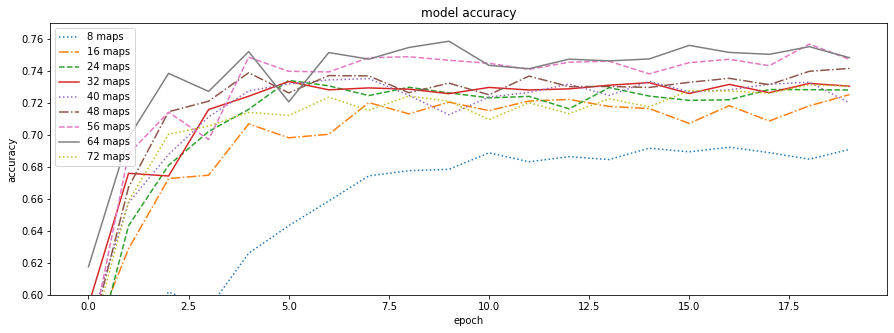

In [15]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot( hist[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.6,0.77])
plt.show()

In [16]:
# Experiment 3
# How large of a dense layer?
    
nets = 8
model = [0]*nets
for j in range(nets):
    model[j] = models.Sequential()
    model[j].add( layers.Conv2D( 56, kernel_size = 5, padding='same', activation='relu', input_shape = input_shape))
    model[j].add( layers.MaxPool2D() )
        
    model[j].add( layers.Conv2D( 112, kernel_size = 5, padding='same', activation='relu') )
    model[j].add( layers.MaxPool2D())
        
    model[j].add( layers.Conv2D( 224, kernel_size = 5, padding='same', activation='relu'))
    model[j].add( layers.MaxPool2D())
        
    model[j].add( layers.Flatten())
    model[j].add( layers.Dense(56*2**(j), activation='relu'))
    model[j].add( layers.Dense(10, activation='softmax'))
    model[j].compile( optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    model[j].summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 56)        4256      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 112)       156912    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 8, 8, 224)         627424    
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 4, 4, 224)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3584)            

_________________________________________________________________
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 32, 32, 56)        4256      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 16, 16, 112)       156912    
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 8, 8, 224)         627424    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 4, 4, 224)         0         
_____________________________________________________

In [17]:
hist = [0]*nets
names = ['56N', '112N', '224N', '448N', '896N', '1792N', '3584N', '7168N']
epochs = 20
for j in range(nets):
    hist[j] = model[j].fit(X_train, y_train, batch_size=80, epochs=epochs, 
                            validation_data=(X_test,y_test), callbacks = [annealer], verbose = 0)
    print( 'CNN {0}: Epochs = {1:d}, Train accuracy = {2:.5f}, Validation accuracy = {3:.5f}'.format(
    names[j], epochs, max(hist[j].history['accuracy']), max(hist[j].history['val_accuracy']) ))

CNN 56N: Epochs = 20, Train accuracy = 0.99642, Validation accuracy = 0.73940
CNN 112N: Epochs = 20, Train accuracy = 0.99530, Validation accuracy = 0.74240
CNN 224N: Epochs = 20, Train accuracy = 0.99746, Validation accuracy = 0.75190
CNN 448N: Epochs = 20, Train accuracy = 0.99602, Validation accuracy = 0.74120
CNN 896N: Epochs = 20, Train accuracy = 0.99634, Validation accuracy = 0.74040
CNN 1792N: Epochs = 20, Train accuracy = 0.99776, Validation accuracy = 0.73600
CNN 3584N: Epochs = 20, Train accuracy = 0.99696, Validation accuracy = 0.73520
CNN 7168N: Epochs = 20, Train accuracy = 0.99754, Validation accuracy = 0.74280


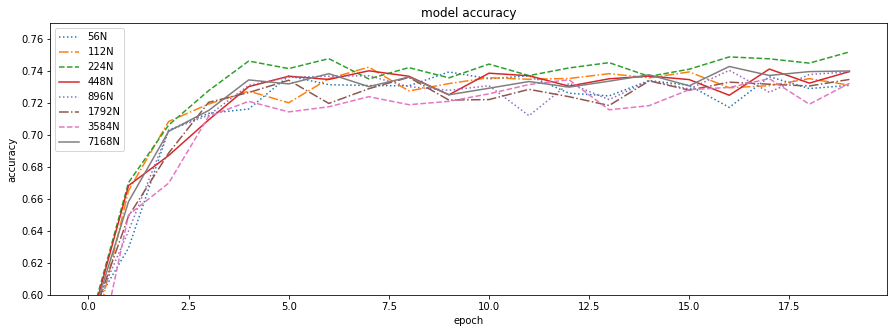

In [18]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot( hist[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.6,0.77])
plt.show()

In [19]:
# Experiment 3
# How large of a dense layer?
    
nets = 3
model = [0]*nets
for j in range(nets):
    model[j] = models.Sequential()
    model[j].add( layers.Conv2D( 56, kernel_size = 5, padding='same', activation='relu', input_shape = input_shape))
    model[j].add( layers.MaxPool2D() )
        
    model[j].add( layers.Conv2D( 112, kernel_size = 5, padding='same', activation='relu') )
    model[j].add( layers.MaxPool2D())
        
    model[j].add( layers.Conv2D( 224, kernel_size = 5, padding='same', activation='relu'))
    model[j].add( layers.MaxPool2D())
        
    model[j].add( layers.Flatten())
    model[j].add( layers.Dense(896, activation='relu'))
    if( j > 0 ):
        model[j].add( layers.Dense(896*2, activation='relu'))
    if( j > 1 ):
        model[j].add( layers.Dense(896*3, activation='relu'))
    model[j].add( layers.Dense(10, activation='softmax'))
    model[j].compile( optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    model[j].summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 56)        4256      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 112)       156912    
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 8, 8, 224)         627424    
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 4, 4, 224)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3584)            

In [20]:
hist = [0]*nets
names = ['Dx1', 'Dx2', 'Dx3']
epochs = 20
for j in range(nets):
    hist[j] = model[j].fit(X_train, y_train, batch_size=80, epochs=epochs, 
                            validation_data=(X_test,y_test), callbacks = [annealer], verbose = 0)
    print( 'CNN {0}: Epochs = {1:d}, Train accuracy = {2:.5f}, Validation accuracy = {3:.5f}'.format(
    names[j], epochs, max(hist[j].history['accuracy']), max(hist[j].history['val_accuracy']) ))

CNN Dx1: Epochs = 20, Train accuracy = 0.99718, Validation accuracy = 0.74080
CNN Dx2: Epochs = 20, Train accuracy = 0.99382, Validation accuracy = 0.73010
CNN Dx3: Epochs = 20, Train accuracy = 0.99132, Validation accuracy = 0.71400


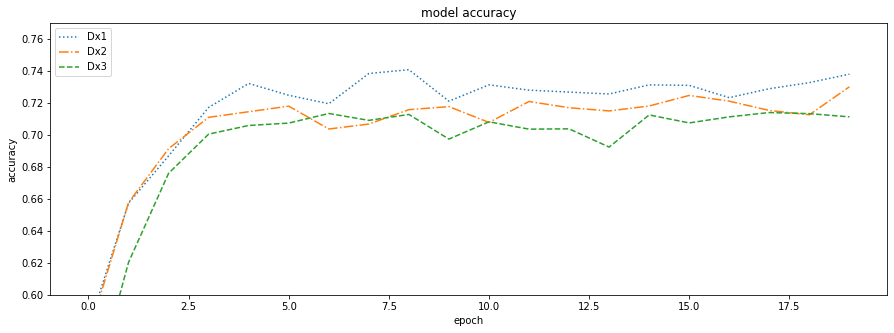

In [21]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot( hist[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.6,0.77])
plt.show()

In [22]:
# Experiment 4
# How much dropout?
    
nets = 9
model = [0]*nets
    
for j in range(nets):
    model[j] = models.Sequential()
    model[j].add( layers.Conv2D( 56, kernel_size = 5, padding='same', activation='relu', input_shape = input_shape))
    model[j].add( layers.MaxPool2D() )
    model[j].add( layers.Dropout(rate=0.01*j+0.25))
        
    model[j].add( layers.Conv2D( 112, kernel_size = 5, padding='same', activation='relu') )
    model[j].add( layers.MaxPool2D())
    model[j].add( layers.Dropout(rate=0.01*j+0.25))
        
    model[j].add( layers.Conv2D( 224, kernel_size = 5, padding='same', activation='relu'))
    model[j].add( layers.MaxPool2D())
    model[j].add( layers.Dropout(rate=0.01*j+0.25))
        
    model[j].add( layers.Flatten())
    model[j].add( layers.Dense(896, activation='relu'))
    model[j].add( layers.Dropout(rate=0.01*j+0.25))
    model[j].add( layers.Dense(10, activation='softmax'))
    model[j].compile( optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    model[j].summary()    

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 56)        4256      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 16, 16, 56)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 16, 16, 112)       156912    
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 8, 8, 112)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 8, 8, 224)       

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 32, 32, 56)        4256      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 16, 16, 56)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 16, 16, 112)       156912    
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 8, 8, 112)         0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 8, 8, 224)       

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 32, 32, 56)        4256      
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 16, 16, 56)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 16, 16, 112)       156912    
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 8, 8, 112)         0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 8, 8, 224)       

In [23]:
hist = [0]*nets
names = ['0.25', '0.26', '0.27', '0.28', '0.29', '0.3', '0.31', '0.32', '0.33', '0.34']
epochs = 20
for j in range(nets):
    hist[j] = model[j].fit(X_train, y_train, batch_size=80, epochs=epochs, 
                            validation_data=(X_test,y_test), callbacks = [annealer], verbose = 0)
    print( 'CNN {0}: Epochs = {1:d}, Train accuracy = {2:.5f}, Validation accuracy = {3:.5f}'.format(
    names[j], epochs, max(hist[j].history['accuracy']), max(hist[j].history['val_accuracy']) ))

CNN 0.25: Epochs = 20, Train accuracy = 0.91992, Validation accuracy = 0.79050
CNN 0.26: Epochs = 20, Train accuracy = 0.91728, Validation accuracy = 0.78980
CNN 0.27: Epochs = 20, Train accuracy = 0.89468, Validation accuracy = 0.79550
CNN 0.28: Epochs = 20, Train accuracy = 0.89878, Validation accuracy = 0.79060
CNN 0.29: Epochs = 20, Train accuracy = 0.88606, Validation accuracy = 0.78750
CNN 0.3: Epochs = 20, Train accuracy = 0.87276, Validation accuracy = 0.78550
CNN 0.31: Epochs = 20, Train accuracy = 0.87748, Validation accuracy = 0.78620
CNN 0.32: Epochs = 20, Train accuracy = 0.87072, Validation accuracy = 0.78600
CNN 0.33: Epochs = 20, Train accuracy = 0.86030, Validation accuracy = 0.78870


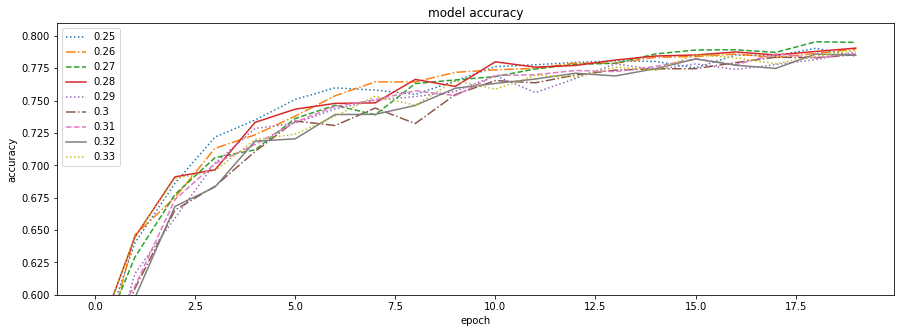

In [24]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot( hist[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.6,0.81])
plt.show()

In [25]:
nets = 5
model = [0] *nets
 
j=0
model[j] = models.Sequential()
model[j].add(layers.Conv2D(56,kernel_size=5, padding='same', activation='relu', input_shape=input_shape))
model[j].add(layers.MaxPool2D())
model[j].add(layers.Dropout(0.28))
    
model[j].add(layers.Conv2D(112,kernel_size=5, padding='same', activation='relu'))
model[j].add(layers.MaxPool2D())
model[j].add(layers.Dropout(0.28))
    
model[j].add(layers.Conv2D(224,kernel_size=5, padding='same', activation='relu'))
model[j].add(layers.MaxPool2D())
model[j].add(layers.Dropout(0.28))
    
model[j].add(layers.Flatten())
model[j].add(layers.Dense(896, activation='relu'))
model[j].add(layers.Dropout(0.28))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 32, 32, 56)        4256      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 16, 16, 56)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 16, 16, 112)       156912    
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 8, 8, 112)         0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 8, 8, 112)         0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 8, 8, 224)       

In [26]:
j=1
model[j] = models.Sequential()
model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.MaxPool2D())
model[j].add(layers.Dropout(0.28))
    
model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.MaxPool2D())
model[j].add(layers.Dropout(0.28))
    
model[j].add(layers.Conv2D(224,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.Conv2D(224,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.MaxPool2D())
model[j].add(layers.Dropout(0.28))
    
model[j].add(layers.Flatten())
model[j].add(layers.Dense(896, activation='relu'))
model[j].add(layers.Dropout(0.28))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 32, 32, 56)        1568      
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 56)        28280     
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 16, 16, 56)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 16, 16, 112)       56560     
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 16, 16, 112)       113008    
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 8, 8, 112)       

In [27]:
j=2
model[j] = models.Sequential()
model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.Conv2D(56,kernel_size=3,strides=2,padding='same',activation='relu'))
model[j].add(layers.Dropout(0.28))

model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.Conv2D(112,kernel_size=3,strides=2,padding='same',activation='relu'))
model[j].add(layers.Dropout(0.28))

model[j].add(layers.Conv2D(224,kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
model[j].add(layers.Conv2D(224,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.Conv2D(224,kernel_size=3,strides=2,padding='same',activation='relu'))
model[j].add(layers.Dropout(0.28))

model[j].add(layers.Flatten())
model[j].add(layers.Dense(896, activation='relu'))
model[j].add(layers.Dropout(0.28))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 32, 32, 56)        1568      
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 32, 32, 56)        28280     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 16, 16, 56)        28280     
_________________________________________________________________
dropout_44 (Dropout)         (None, 16, 16, 56)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 16, 16, 112)       56560     
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 16, 16, 112)       113008    
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 8, 8, 112)       

In [28]:
j=3
model[j] = models.Sequential()
model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(56,kernel_size=3,strides=2,padding='same',activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Dropout(0.28))

model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(112,kernel_size=3,strides=2,padding='same',activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Dropout(0.28))

model[j].add(layers.Conv2D(224, padding='same', kernel_size=3,activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(224, padding='same', kernel_size=3,activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(224, padding='same', kernel_size=3,strides=2,activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Dropout(0.28))

model[j].add(layers.Flatten())
model[j].add(layers.Dense(896, activation='relu'))
model[j].add(layers.Dropout(0.28))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model[j].summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 32, 32, 56)        1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 56)        224       
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 32, 32, 56)        28280     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 56)        224       
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 16, 16, 56)        28280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 56)        224       
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 56)      

In [29]:
j=4
model[j] = models.Sequential()
model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu',input_shape=input_shape))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(56,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(56,kernel_size=3,strides=2,padding='same',activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Dropout(0.28))

model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(112,kernel_size=3, padding='same', activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(112,kernel_size=3,strides=2,padding='same',activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Dropout(0.28))

model[j].add(layers.Conv2D(224, padding='same', kernel_size=3,activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(224, padding='same', kernel_size=3,activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Conv2D(224, padding='same', kernel_size=3,strides=2,activation='relu'))
model[j].add(layers.BatchNormalization())
model[j].add(layers.Dropout(0.28))

model[j].add(layers.Flatten())
model[j].add(layers.Dense(896, activation='relu'))
model[j].add(layers.Dropout(0.28))
model[j].add(layers.Dense(10, activation='softmax'))
model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )
model[j].summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 32, 32, 56)        1568      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 56)        224       
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 32, 32, 56)        28280     
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 56)        224       
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 16, 16, 56)        28280     
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 56)        224       
_________________________________________________________________
dropout_52 (Dropout)         (None, 16, 16, 56)      

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
hist = [0]*nets
names = ['basic', '32C3-32C3', '32C5S2', 'both+BN', 'both+BN+DA']
epochs = 20

In [32]:
hist = [0]*nets
names = ['basic', '32C3-32C3', '32C5S2', 'both+BN', 'both+BN+DA']
epochs = 45

for j in range(nets-1):
    hist[j] = model[j].fit(X_train, y_train, batch_size=80, epochs=epochs,
                            validation_data=(X_test,y_test), callbacks = [annealer], verbose = 0)
    print( 'CNN {0}: Epochs = {1:d}, Train accuracy = {2:.5f}, Validation accuracy = {3:.5f}'.format(
    names[j], epochs, max(hist[j].history['accuracy']), max(hist[j].history['val_accuracy']) ))
    
    
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1)
    
j = nets-1
hist[j] = model[j].fit( datagen.flow(X_train, y_train, batch_size=64), 
                        epochs=epochs, steps_per_epoch = X_train.shape[0]//64, 
                        validation_data=(X_test,y_test), callbacks = [annealer], 
                        verbose = 0 )
print( 'CNN {0}: Epochs = {1:d}, Train accuracy = {2:.5f}, Validation accuracy = {3:.5f}'.format(
    names[j], epochs, max(hist[j].history['accuracy']), max(hist[j].history['val_accuracy']) ))

CNN basic: Epochs = 45, Train accuracy = 0.96348, Validation accuracy = 0.80740
CNN 32C3-32C3: Epochs = 45, Train accuracy = 0.97742, Validation accuracy = 0.84240
CNN 32C5S2: Epochs = 45, Train accuracy = 0.09978, Validation accuracy = 0.10000
CNN both+BN: Epochs = 45, Train accuracy = 0.99694, Validation accuracy = 0.86620
CNN both+BN+DA: Epochs = 45, Train accuracy = 0.96930, Validation accuracy = 0.89200


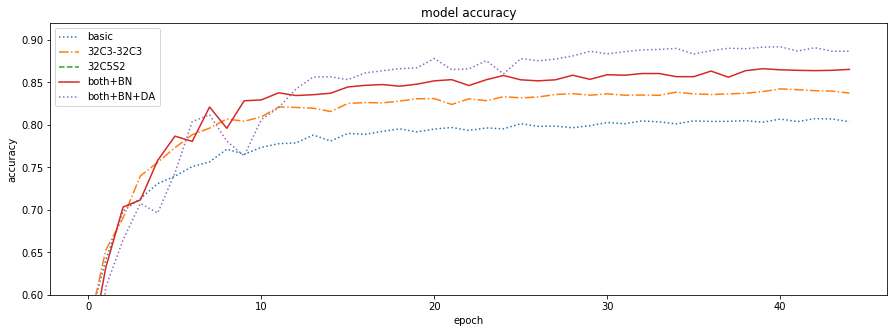

In [33]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot( hist[i].history['val_accuracy'], linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.6,0.92])
plt.show()